<h1 style='color:rgb(144, 12, 63)'; align=center><font size = 8> PROJECT NAME: MANITOBA CROP YIELDS ASSESSMENT FROM 2000 TO 2022 </font></h1>

<h2 style='color:rgb(144, 12, 63)'; align=left><font size = 6> Notebook 01 - MANITOBA CROP YIELDS </font></h2>

<h3 style='color:rgb(144, 12, 63)'; align=left><font size = 5> DATA MINING </font></h3>

The purpose of this notebook is to inspect the `Crop Yield` excel file, making sure the data is ready to be used in analytics.

# REVISION HISTORY

| REV | DESCRIPTION             | DATE           |  BY   | CHECK | APPROVE  |
|:---:|:-----------------------:|:--------------:|:-----:|:-----:|:--------:|
| A0  | ISSUED FOR -(HOLD)      |                |  IAC  |       |          |
|     |                         |                |       |       |          |

## DETAILED REVISION DESCRIPTION

> A0 - Issued for `HOLD`

# REQUIRED LIBRARIES

The following libraries are required to run this notebook:

In [1]:
# Library to find and identify missing values
import missingno as msno 

In [2]:
# Library to create tabular data
import pandas as pd

# LOADING THE DATA SETS

This section discusses the scripts used to load the data into a pandas data structure

## DATA PATH

In [3]:
# The path to the shape file 
dataPath = "./00_data/01_Crop_Yield_Data/"

## FILE NAME

In [4]:
# Filename
cropYield_xls = "manitobaYieldData_2022.xlsx"

## LOAD THE FILE

In [5]:
# Load the dataset into memory
manitobaCropYield_df = pd.read_excel(dataPath + cropYield_xls)

manitobaCropYield_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds
...,...,...,...,...,...,...,...,...,...
61039,2022,YELLOWHEAD,BARLEY,F,Below,Minimum,Tolerance,NaN,NaN
61040,2022,YELLOWHEAD,FIELD PEAS,D,Below,Minimum,Tolerance,NaN,NaN
61041,2022,YELLOWHEAD,FLAX,B,Below,Minimum,Tolerance,NaN,NaN
61042,2022,YELLOWHEAD,FLAX,C,Below,Minimum,Tolerance,NaN,NaN


# PRELIMINARY DATA SET INSPECTION

It apprears like there are a number of missing values in this data set. 

In [6]:
# Get the info from the file
manitobaCropYield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  61044 non-null  int64 
 1   Risk Area / R.M.      61044 non-null  object
 2   Crop                  61044 non-null  object
 3   Soil                  61044 non-null  object
 4   Farms                 61044 non-null  object
 5   Acres                 61044 non-null  object
 6   Yield/acre(Metric)    61044 non-null  object
 7   Yield/acre(Metric).1  24887 non-null  object
 8   Yield/acre(Imperial)  24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.2+ MB


## ASSESSMENT

It appears like there are a number of records with irrelevant information. These fields include:

> `Farms` - A numercial field that has a number of records with `Below` as an entree

> `Acres` - A numercial field that has a number of records with `Minimum` as an entree

> `Yield/acre(Metric)` - A numberical field that has a number of records with `Tolerance` as an entree

> `Yield/acre(Metric).1` - A categorical field with 24,887 records of `NaN` (missing values)

>  `Yield/acre(Imperial)` - A numerical field with 24,887 records of `NaN` (missing values)

<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">MEANING OF BELOW MINIMUM TOLERANCE</h4>
  <p>According to the <a href="https://www.masc.mb.ca/masc.nsf/mmpp_browser_soil_types.html" class="alert-link">Manitoba Agriculture Services Corporation</a>, <b>Below Minimum Tolerance </b> records contain data from fewer thatn 3 producers or 500 acres, marked as such to retain producer anonymity. Data from these records is included in the Search Summary totals.</p>
</div>

Because there is no usable information in records containing `Below Minimum Tolerance`, it is recommended that these records be deleted. 

Before deleting, let us confirm missing values.

## MISSING VALUES

<Axes: >

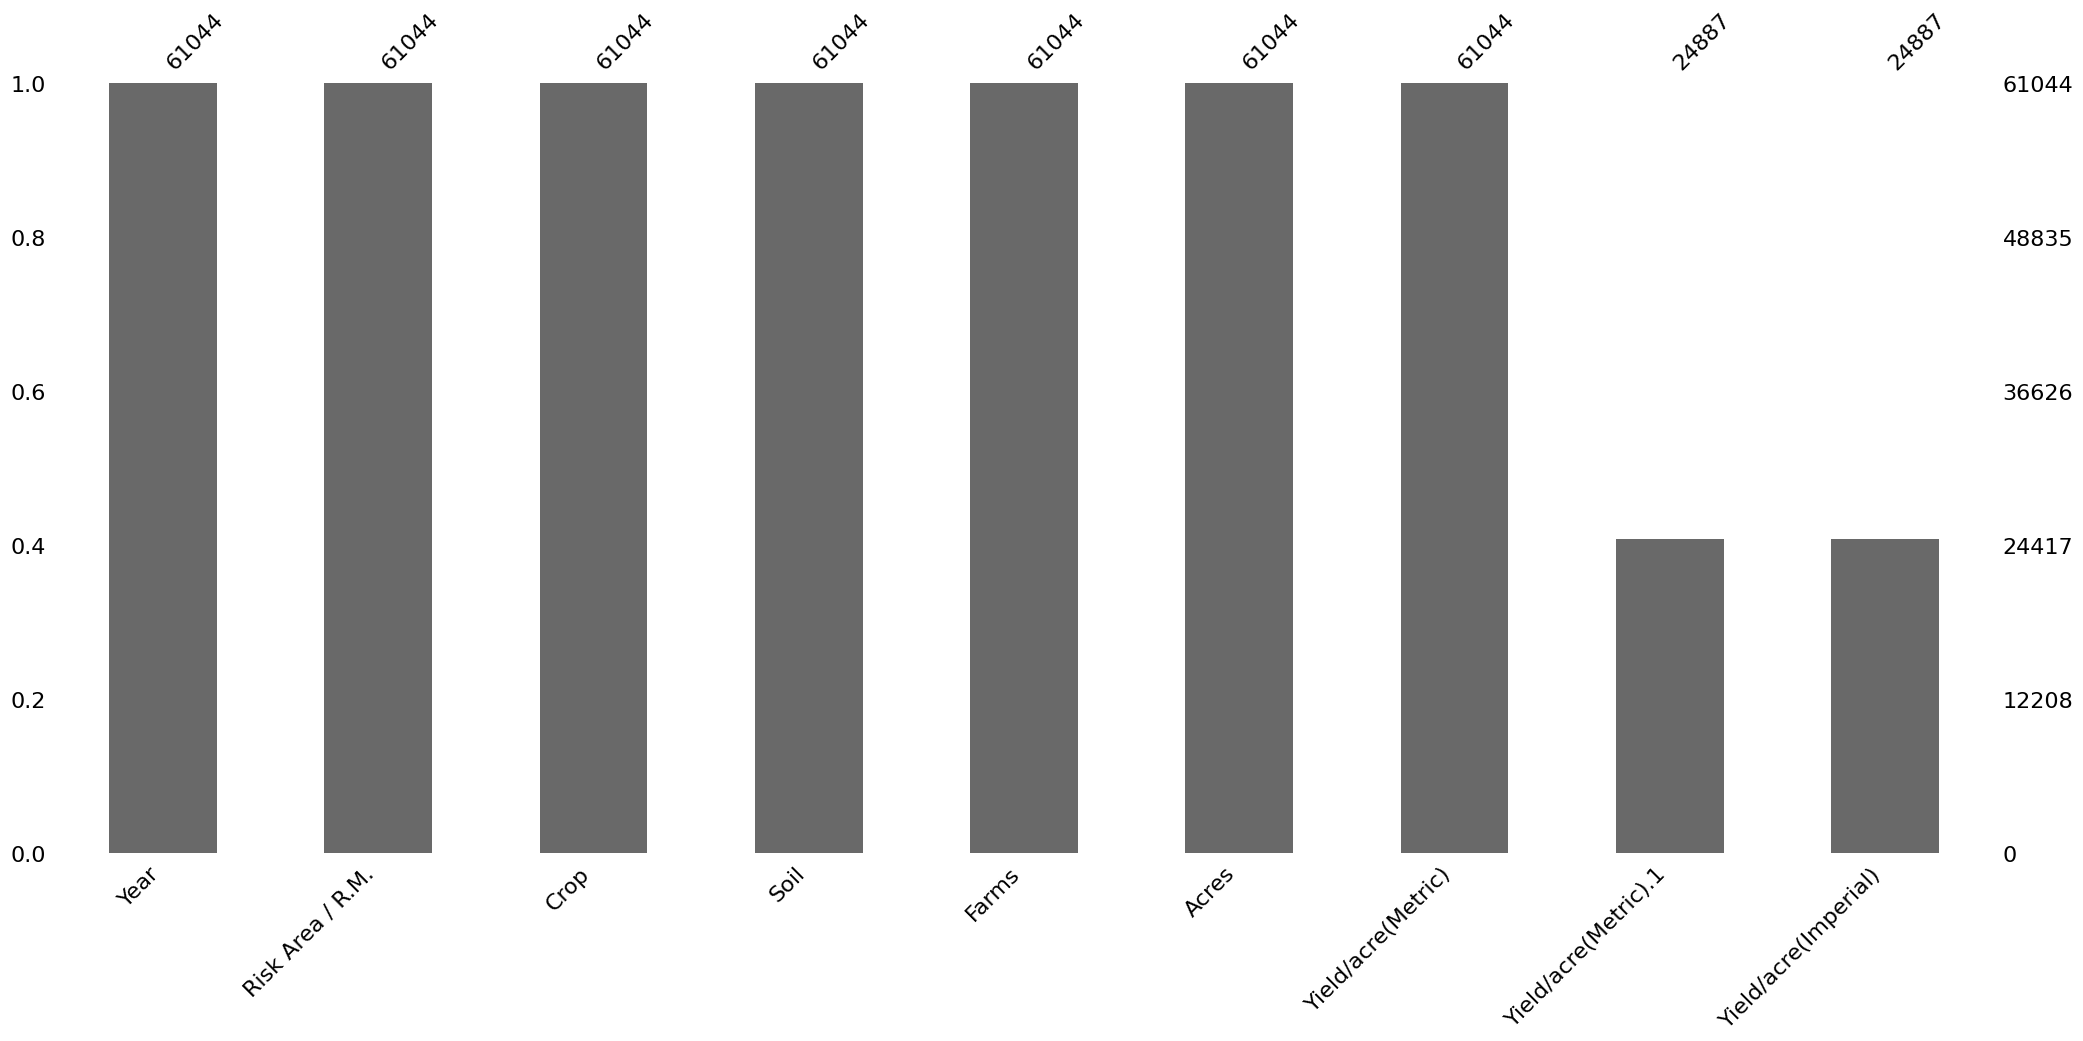

In [7]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(manitobaCropYield_df) 

<Axes: >

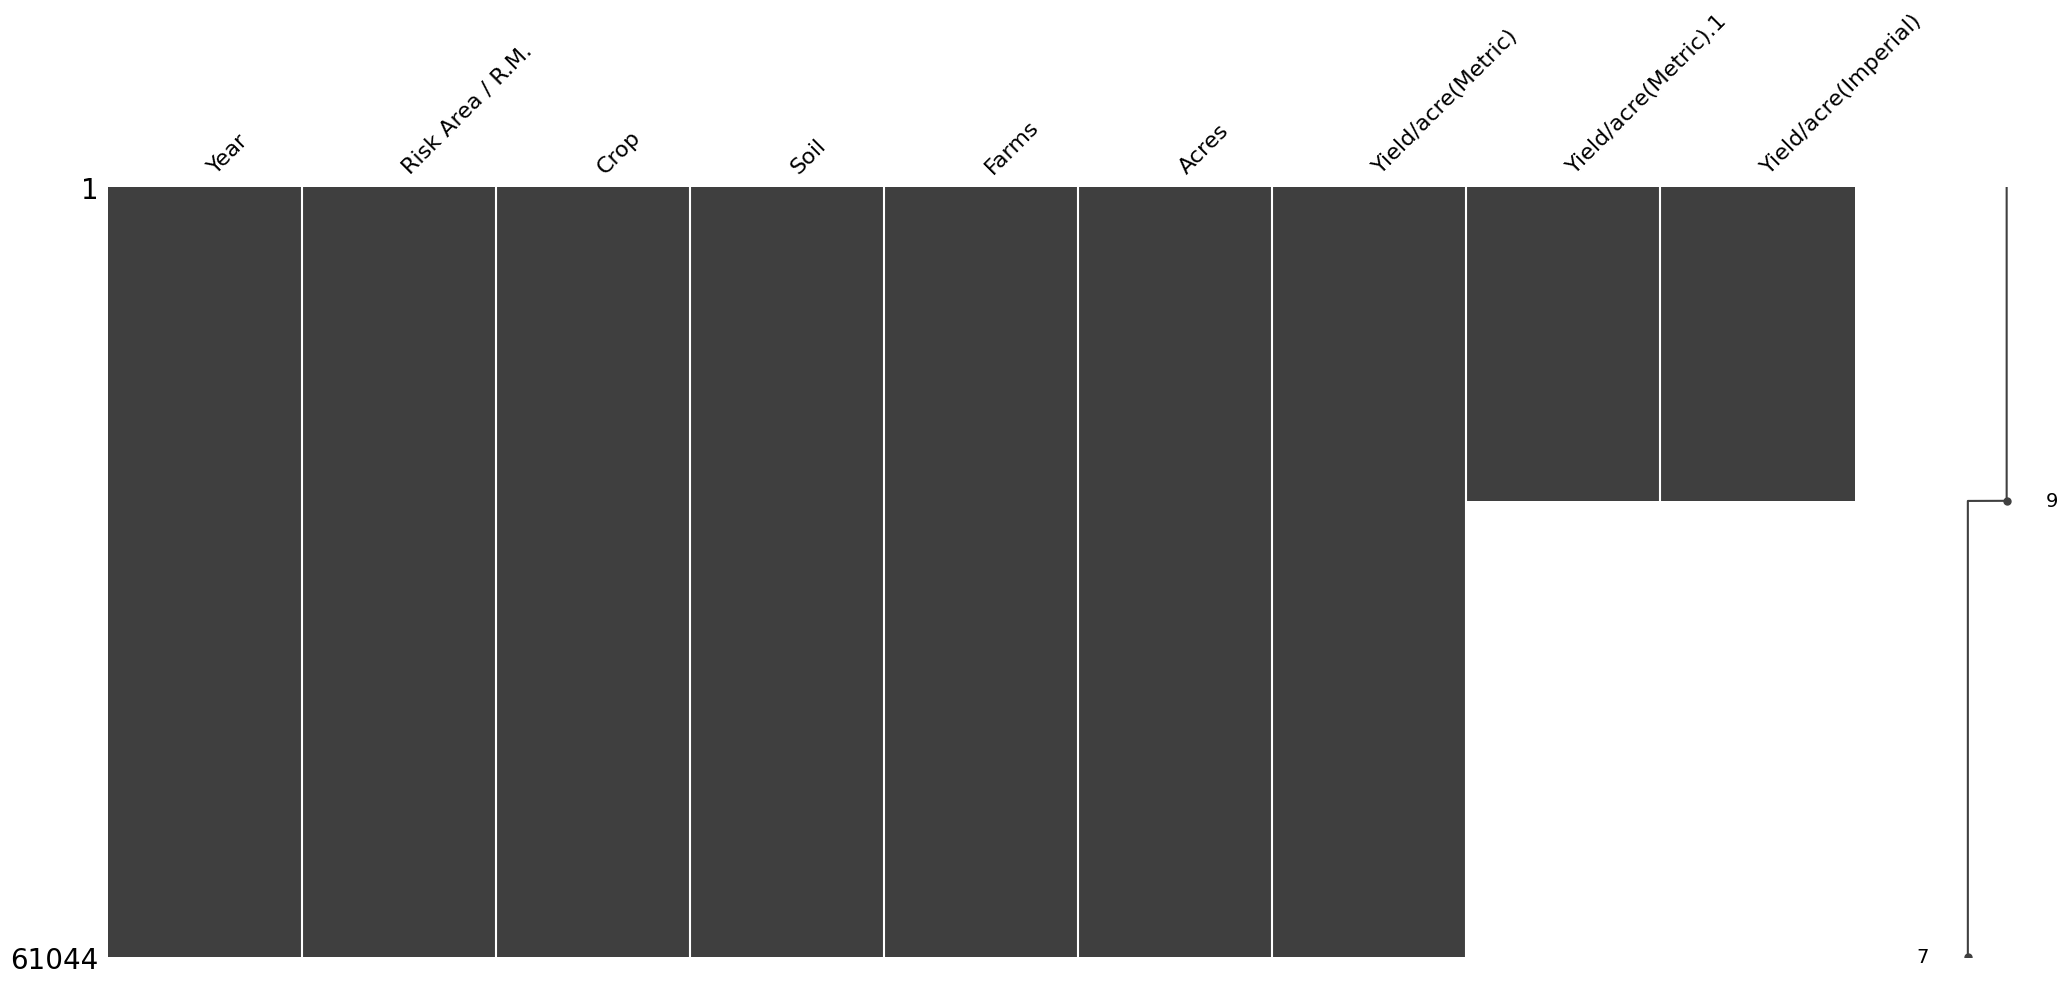

In [8]:
# Visualize missing values as a matrix 
msno.matrix(manitobaCropYield_df) 

This analysis demonstrates that missing values are associated with `Below Minimum Tolernace` records. 

### DELETING MISSING VALUES

The following steps will delete missing values from this data set. All other ETL functions will be performed in other notebooks.

In [9]:
# Drop all the columns related to `Below Minimum Tolerance`. This step also removes missing values from the data set
manitobaCropYield_NaN_deleted = manitobaCropYield_df[manitobaCropYield_df['Farms'] != 'Below']

manitobaCropYield_NaN_deleted

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds
...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345 Tonnes,Tonnes,0.381 Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302 Tonnes,Tonnes,0.332 Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007 Tonnes,Tonnes,0.3 Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233 Tonnes,Tonnes,0.257 Tons


# ETL

### RENAMING FIELDS

To rename these fields, a dictionary needs to be created:

In [10]:
# Dictionary of fields to be renamed
renamedColumns_dict = {
    'Yield/acre(Metric)' : 'Yield/Acre Metric',
    'Yield/acre(Metric).1' : 'UOM in Metric',
    'Yield/acre(Imperial)' : 'Yield/Acre Imperial'
}   

In [11]:
# Update columns
manitobaCropYield_etl_1_df = manitobaCropYield_NaN_deleted.rename(
    columns = renamedColumns_dict
)

manitobaCropYield_etl_1_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds
...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345 Tonnes,Tonnes,0.381 Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302 Tonnes,Tonnes,0.332 Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007 Tonnes,Tonnes,0.3 Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233 Tonnes,Tonnes,0.257 Tons


### CREATE NEW COLUMN NAMED `UOM Imperial`

The following step creates this new feature:

In [12]:
# Create a new empty feature
manitobaCropYield_etl_1_df['UOM Imperial'] = ''

manitobaCropYield_etl_1_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds,
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds,
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds,
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds,
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds,
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345 Tonnes,Tonnes,0.381 Tons,
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302 Tonnes,Tonnes,0.332 Tons,
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007 Tonnes,Tonnes,0.3 Bushels,
24885,2021,HANOVER,ALFALFA,E,5,543,0.233 Tonnes,Tonnes,0.257 Tons,


### TRANSFORM `Yield/Acre Metric`

The following steps are used to inspect and plan how to transform this feature.

In [13]:
# Inspect the values found in this column
manitobaCropYield_etl_1_df['Yield/Acre Metric'].value_counts()

0.906 Tonnes    35
0.874 Tonnes    35
0.708 Tonnes    33
0.919 Tonnes    32
0.620 Tonnes    30
                ..
2.455 Tonnes     1
1.998 Tonnes     1
2.428 Tonnes     1
2.412 Tonnes     1
0.000 Tonnes     1
Name: Yield/Acre Metric, Length: 2467, dtype: int64

In [14]:
# Inspect the values in this column
manitobaCropYield_etl_1_df['UOM in Metric'].value_counts()

Tonnes    24887
Name: UOM in Metric, dtype: int64

It appears that `Tonnes` is the only value in `Yield/Acre Metric`, and is the only value in `UOM in Metric`. Therefore; the conversion of `Yield/Acre Metric` to numerical is a simple process. Below are the steps:

In [15]:
# Create a copy of the data set
manitobaCropYield_etl_2_df = manitobaCropYield_etl_1_df.copy()

In [16]:
# Transform the feature to a numerical one
manitobaCropYield_etl_2_df['Yield/Acre Metric'] = manitobaCropYield_etl_2_df['Yield/Acre Metric'].str.replace(' Tonnes', '').astype(float)

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997 Pounds,
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449,Tonnes,991 Pounds,
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990 Pounds,
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444,Tonnes,980 Pounds,
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968 Pounds,
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381 Tons,
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332 Tons,
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.3 Bushels,
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257 Tons,


In [17]:
# Verify the transformation was succesful
manitobaCropYield_etl_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 0 to 24886
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 24887 non-null  int64  
 1   Risk Area / R.M.     24887 non-null  object 
 2   Crop                 24887 non-null  object 
 3   Soil                 24887 non-null  object 
 4   Farms                24887 non-null  object 
 5   Acres                24887 non-null  object 
 6   Yield/Acre Metric    24887 non-null  float64
 7   UOM in Metric        24887 non-null  object 
 8   Yield/Acre Imperial  24887 non-null  object 
 9   UOM Imperial         24887 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


### TRANSFORM `Yield/Acre Imperial`

The following steps are used to inspect and plan how to transform this feature.

In [18]:
# Inspect the values in the column
manitobaCropYield_etl_2_df['Yield/Acre Imperial'].value_counts()

30.3 Bushels    63
43.9 Bushels    60
41.2 Bushels    59
31.2 Bushels    58
42.6 Bushels    58
                ..
3.597 Tons       1
3.596 Tons       1
3.593 Tons       1
3,584 Pounds     1
0.0 Bushels      1
Name: Yield/Acre Imperial, Length: 2128, dtype: int64

In [19]:
# Copy the values to another feature
manitobaCropYield_etl_2_df['UOM Imperial'] = manitobaCropYield_etl_2_df['Yield/Acre Imperial']

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997 Pounds,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449,Tonnes,991 Pounds,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990 Pounds,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444,Tonnes,980 Pounds,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968 Pounds,968 Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381 Tons,0.381 Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332 Tons,0.332 Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.3 Bushels,0.3 Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257 Tons,0.257 Tons


In [20]:
# Remove non-numeric parts and convert to float
manitobaCropYield_etl_2_df['Yield/Acre Imperial'] = manitobaCropYield_etl_2_df['Yield/Acre Imperial'].str.replace(
    '[^\d\.]', 
    '', 
    regex = True
).str.replace(',', '.').astype(float)

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997.000,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449,Tonnes,991.000,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990.000,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444,Tonnes,980.000,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968.000,968 Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381,0.381 Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332,0.332 Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.300,0.3 Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257,0.257 Tons


In [21]:
# Remove numeric values and whitespace
manitobaCropYield_etl_2_df['UOM Imperial']= manitobaCropYield_etl_2_df['UOM Imperial'].str.replace(
    '[\d\.,]', 
    '', 
    regex = True
).str.strip()

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997.000,Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449,Tonnes,991.000,Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990.000,Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444,Tonnes,980.000,Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968.000,Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381,Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332,Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.300,Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257,Tons


In [22]:
# Confirm transformations were succesful
manitobaCropYield_etl_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 0 to 24886
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 24887 non-null  int64  
 1   Risk Area / R.M.     24887 non-null  object 
 2   Crop                 24887 non-null  object 
 3   Soil                 24887 non-null  object 
 4   Farms                24887 non-null  object 
 5   Acres                24887 non-null  object 
 6   Yield/Acre Metric    24887 non-null  float64
 7   UOM in Metric        24887 non-null  object 
 8   Yield/Acre Imperial  24887 non-null  float64
 9   UOM Imperial         24887 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.1+ MB


In [23]:
# Verify the values to confirm success
manitobaCropYield_etl_2_df['UOM Imperial'].value_counts()

Bushels    24255
Tons         415
Pounds       217
Name: UOM Imperial, dtype: int64

### TRANSFORM `Acres`

The following steps are used to inspect and plan how to transform this feature.

In [24]:
# Extract the feature into a list
acres_list = manitobaCropYield_etl_2_df['Acres'].to_list()

In [25]:
# Create an empty list that will hold empty values
acresNumberical_list = []

In [26]:
# For loop to convert the values to numerical
for acre in acres_list:
    # Convert the value to integer
    try:
        acre = int(acre)
    except:
        if ',' in acre:
            acre = acre.replace(',', '')
            acre = int(float(acre))
    # Append to new list of converted values
    acresNumberical_list.append(acre)         

In [27]:
# Update the dataframe
manitobaCropYield_etl_2_df['Acres'] = acresNumberical_list

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997.000,Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,1180,0.449,Tonnes,991.000,Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990.000,Pounds
3,2009,MORRIS,CANARYSEED,D,3,1072,0.444,Tonnes,980.000,Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968.000,Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381,Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332,Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.300,Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257,Tons


In [28]:
# Verify the results
manitobaCropYield_etl_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 0 to 24886
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 24887 non-null  int64  
 1   Risk Area / R.M.     24887 non-null  object 
 2   Crop                 24887 non-null  object 
 3   Soil                 24887 non-null  object 
 4   Farms                24887 non-null  object 
 5   Acres                24887 non-null  int64  
 6   Yield/Acre Metric    24887 non-null  float64
 7   UOM in Metric        24887 non-null  object 
 8   Yield/Acre Imperial  24887 non-null  float64
 9   UOM Imperial         24887 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.1+ MB


### TRANSFORM `Farms`

The following steps are used to inspect and plan how to transform this feature.

In [29]:
manitobaCropYield_etl_2_df['Farms'] = manitobaCropYield_etl_2_df['Farms'].astype(int)

manitobaCropYield_etl_2_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997.000,Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,1180,0.449,Tonnes,991.000,Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990.000,Pounds
3,2009,MORRIS,CANARYSEED,D,3,1072,0.444,Tonnes,980.000,Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968.000,Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381,Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332,Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.300,Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257,Tons


In [30]:
# Verify the transformation is succesful
manitobaCropYield_etl_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 0 to 24886
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 24887 non-null  int64  
 1   Risk Area / R.M.     24887 non-null  object 
 2   Crop                 24887 non-null  object 
 3   Soil                 24887 non-null  object 
 4   Farms                24887 non-null  int64  
 5   Acres                24887 non-null  int64  
 6   Yield/Acre Metric    24887 non-null  float64
 7   UOM in Metric        24887 non-null  object 
 8   Yield/Acre Imperial  24887 non-null  float64
 9   UOM Imperial         24887 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


### RENAME `Risk Area / R.M.` to `Municipality`

The following steps are used to inspect and plan how to rename this feature.

In [31]:
# Rename a column
manitobaCropYield_etl_2_df.rename(
    columns = {"Risk Area / R.M." : "Municipality"},
    inplace = True
)

In [32]:
# Inspect the data frame
manitobaCropYield_etl_2_df

,Year,Municipality,Crop,Soil,Farms,Acres,Yield/Acre Metric,UOM in Metric,Yield/Acre Imperial,UOM Imperial
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452,Tonnes,997.000,Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,1180,0.449,Tonnes,991.000,Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449,Tonnes,990.000,Pounds
3,2009,MORRIS,CANARYSEED,D,3,1072,0.444,Tonnes,980.000,Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439,Tonnes,968.000,Pounds
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.345,Tonnes,0.381,Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.302,Tonnes,0.332,Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.007,Tonnes,0.300,Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.233,Tonnes,0.257,Tons


# SAVE DATA SET

The following steps saves the data set so that it can be used in the next step.

In [33]:
# The path to the Manitoba Cropy Yield data
dataPath = "./00_data/"

In [34]:
# Savename
saveName = "manitobaYieldData_2022.csv"

In [35]:
# Save the csv
manitobaCropYield_etl_2_df.to_csv(
    dataPath + saveName,
    index = False
)